In [1]:
import os
import torch          # PyTorch
import numpy as np    # Numpy
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import genfromtxt

import sys
sys.path.insert(1, '../../miscelaneous')
from spinnorse_tools import fetch_files, plot_in_v_out

# Import a simple LIF feedforward cell
from norse.torch.module.lif import LIFFeedForwardCell
from norse.torch.functional.lif import LIFParameters, LIFState, LIFFeedForwardState

In [2]:
# Timestep and Sim Duration in seconds
dt = 0.001

# Cell parameters
p=LIFParameters(tau_syn_inv=torch.tensor(1000/5.0),
                tau_mem_inv=torch.tensor(1000/20.0), 
                v_leak=torch.tensor(-65.0),
                v_th=torch.tensor(-50.0),
                v_reset=torch.tensor(-65.0), 
                method='super',
                alpha=torch.tensor(0.))

v_0 = -65.0
i_0 = 0.0
w = 19.07

lif_cell = LIFFeedForwardCell(p, dt)

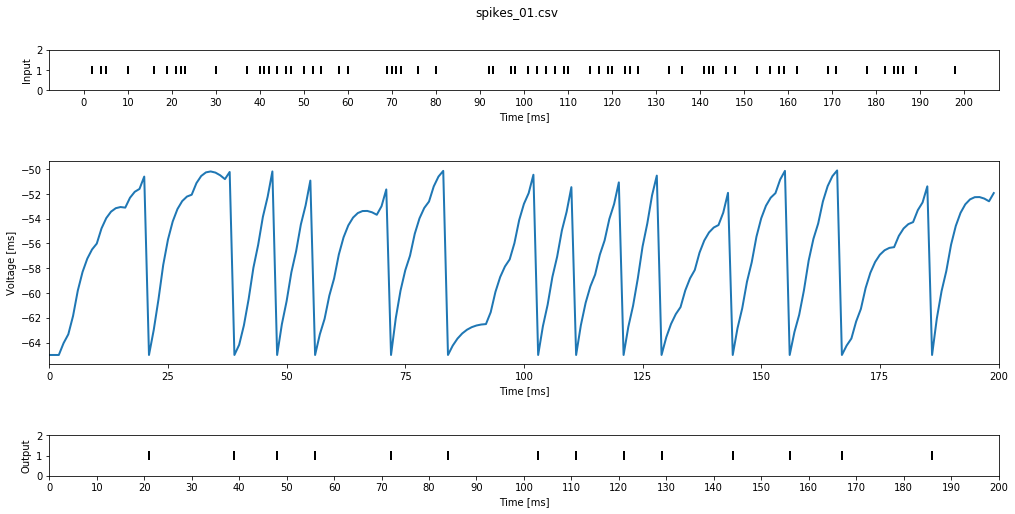

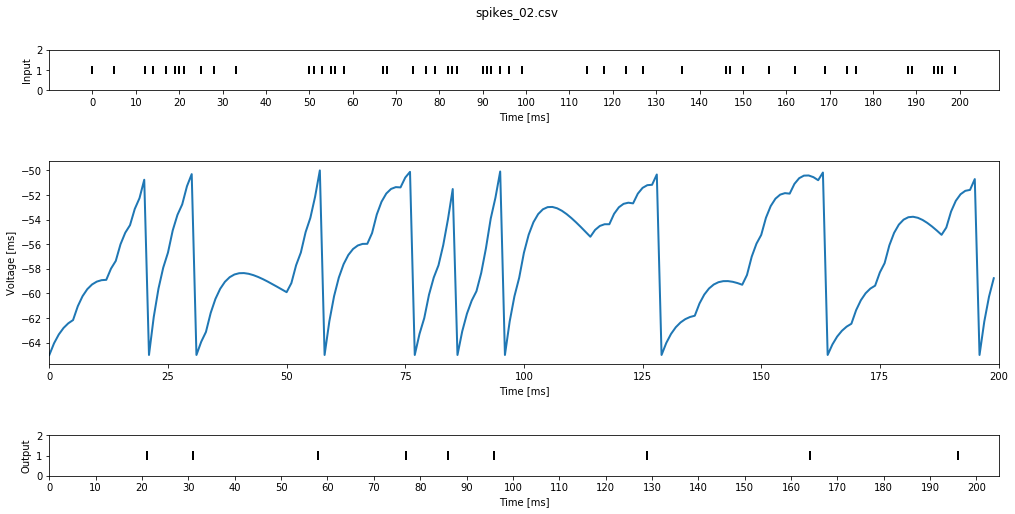

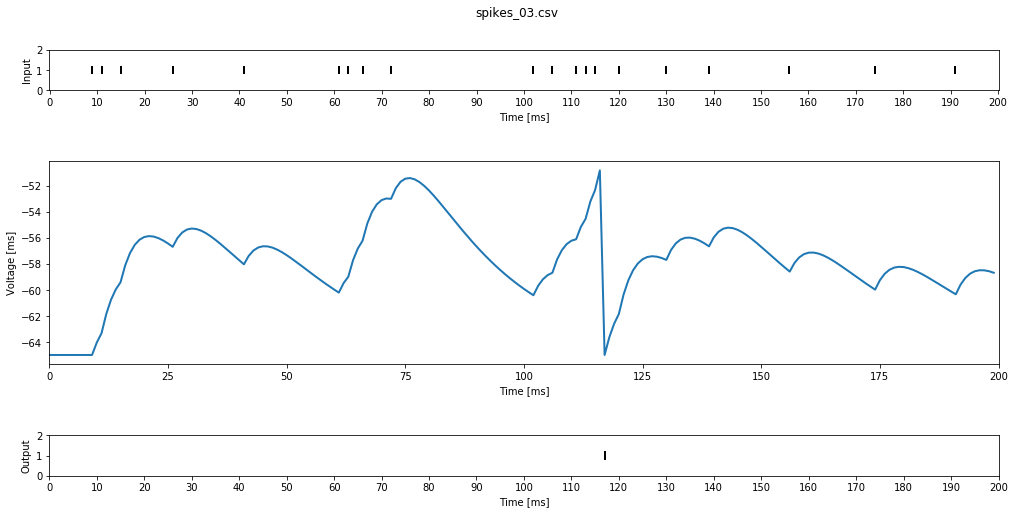

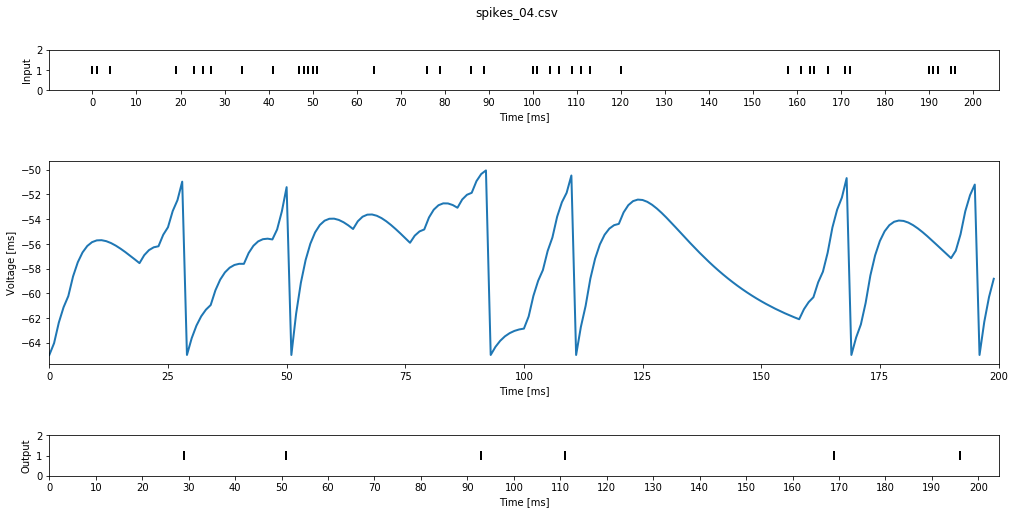

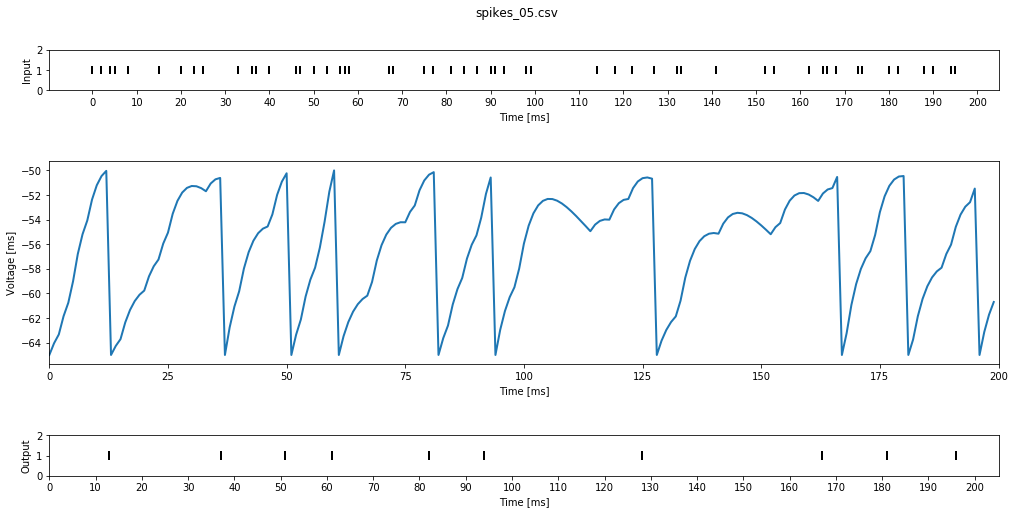

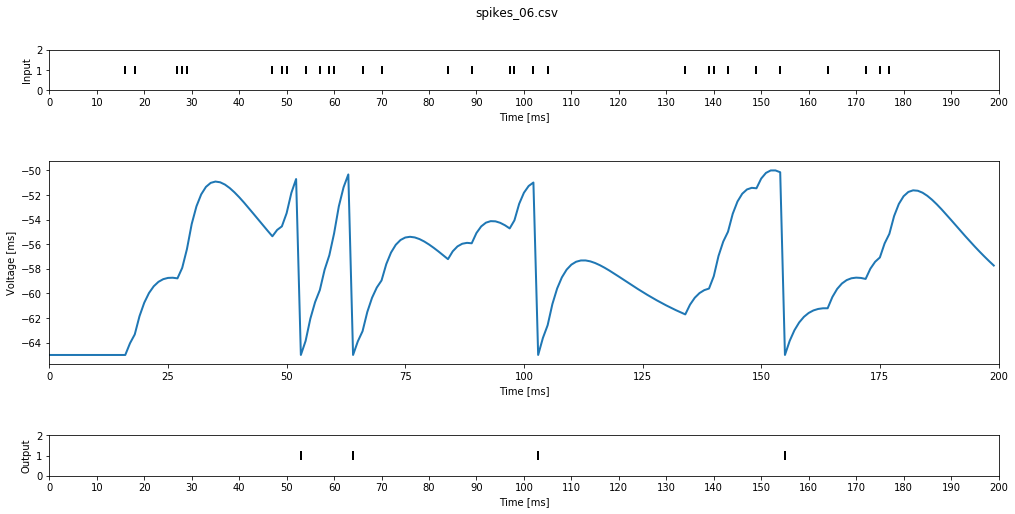

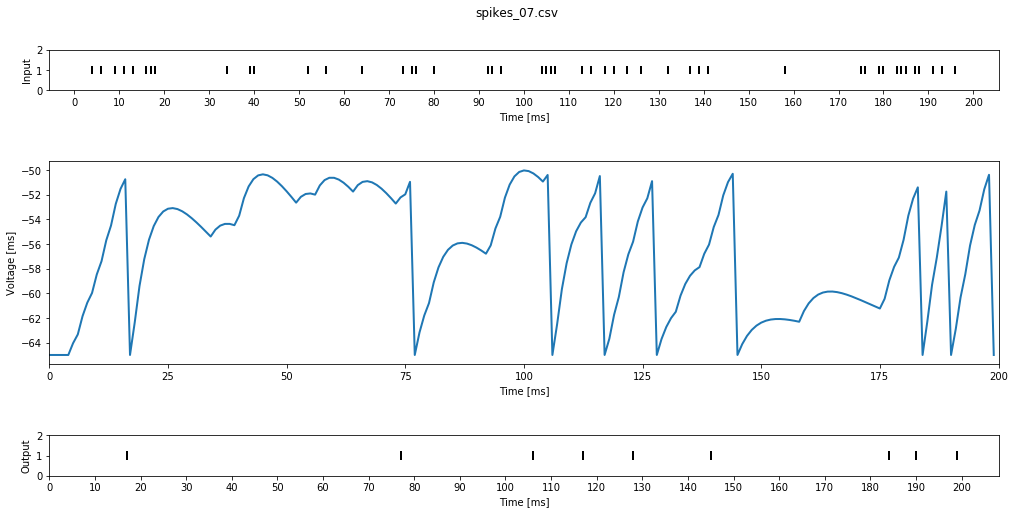

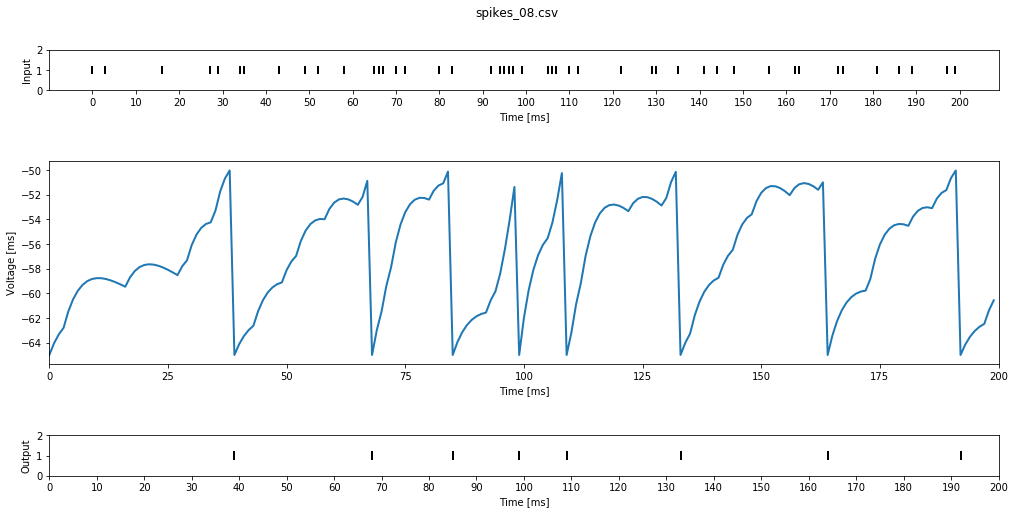

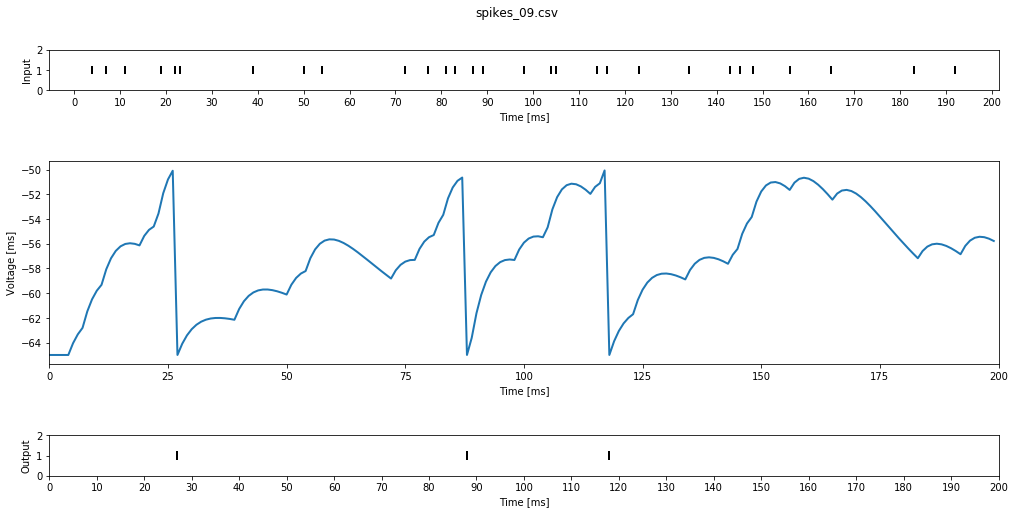

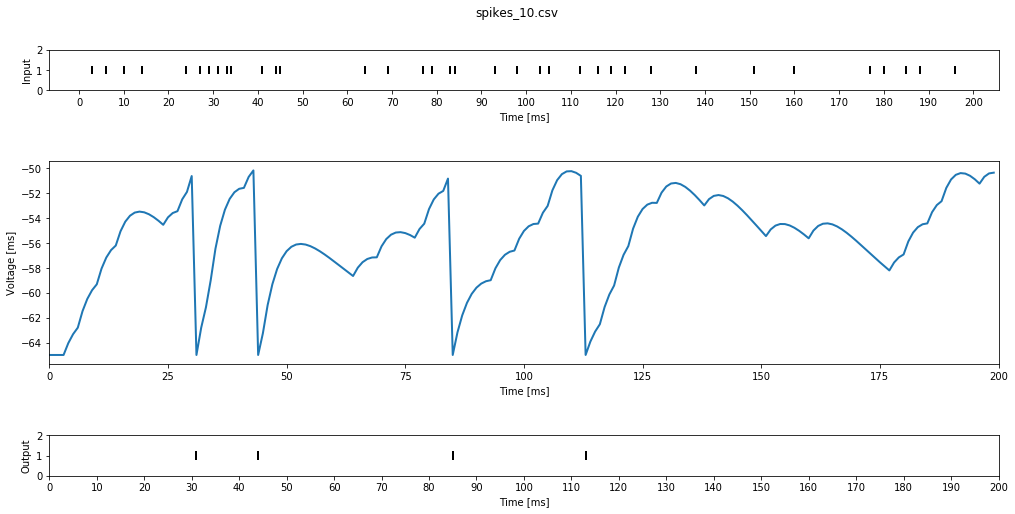

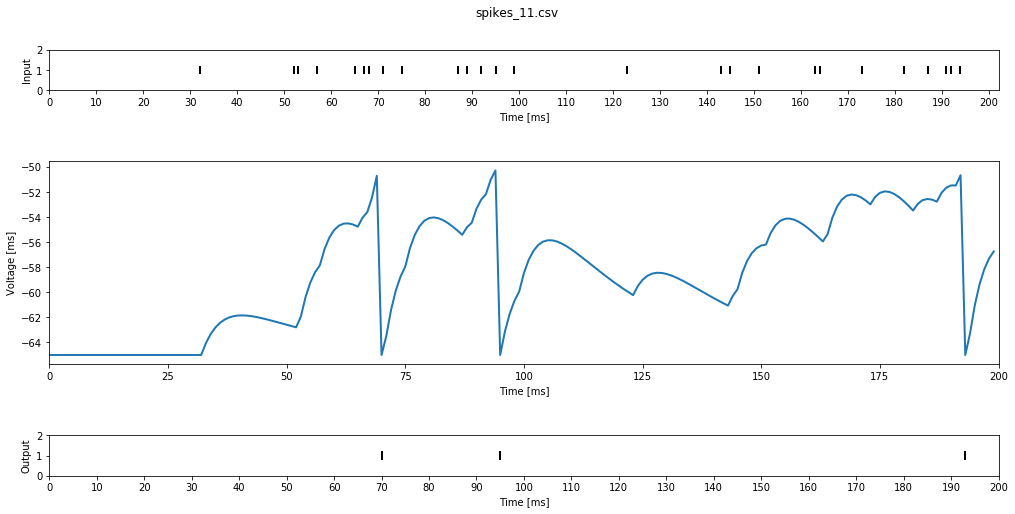

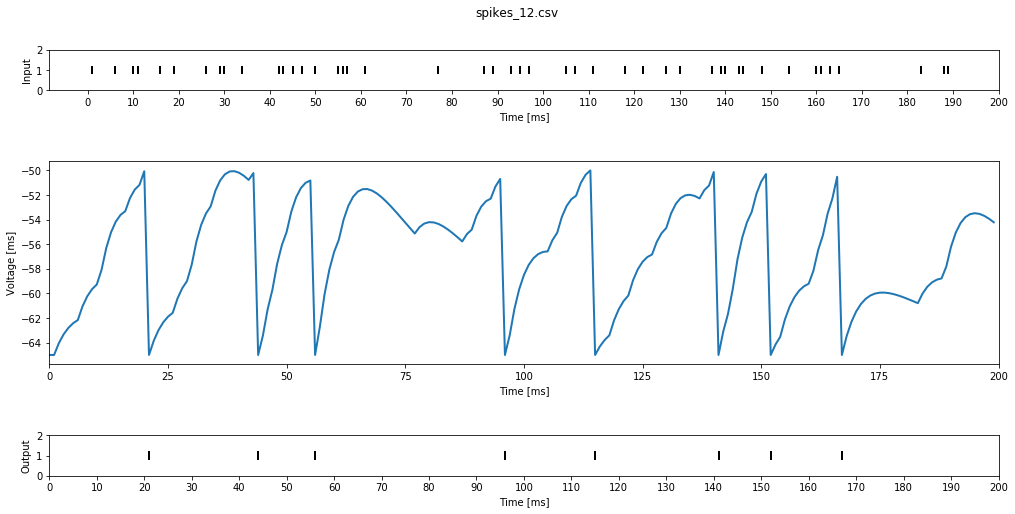

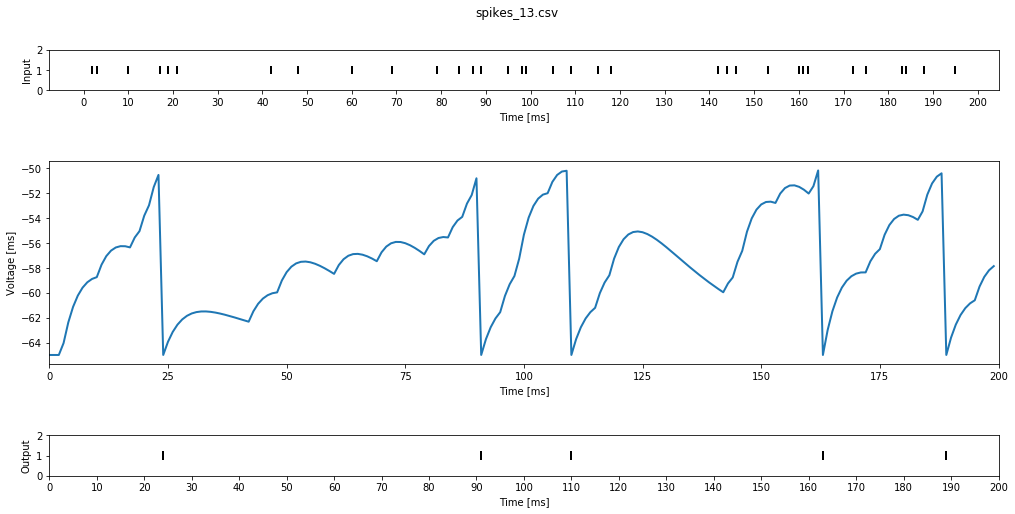

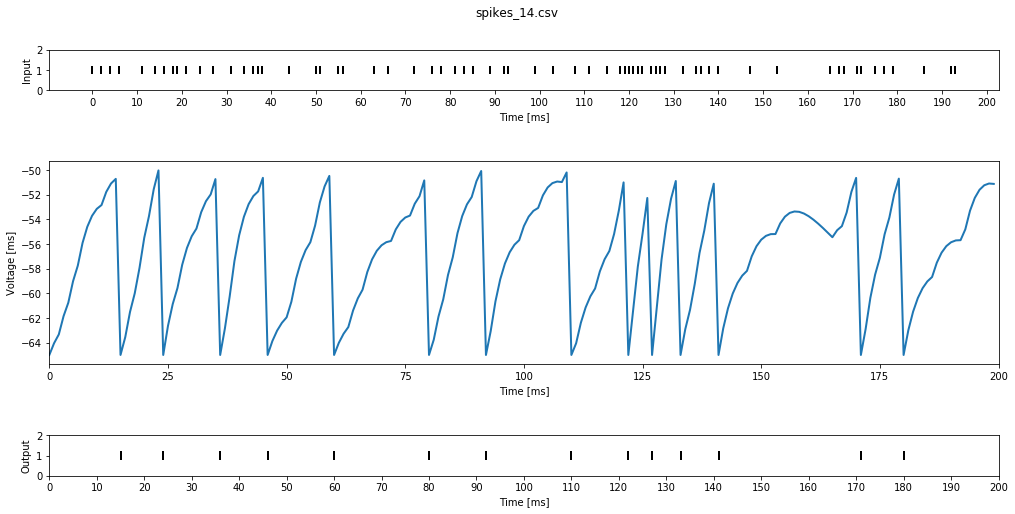

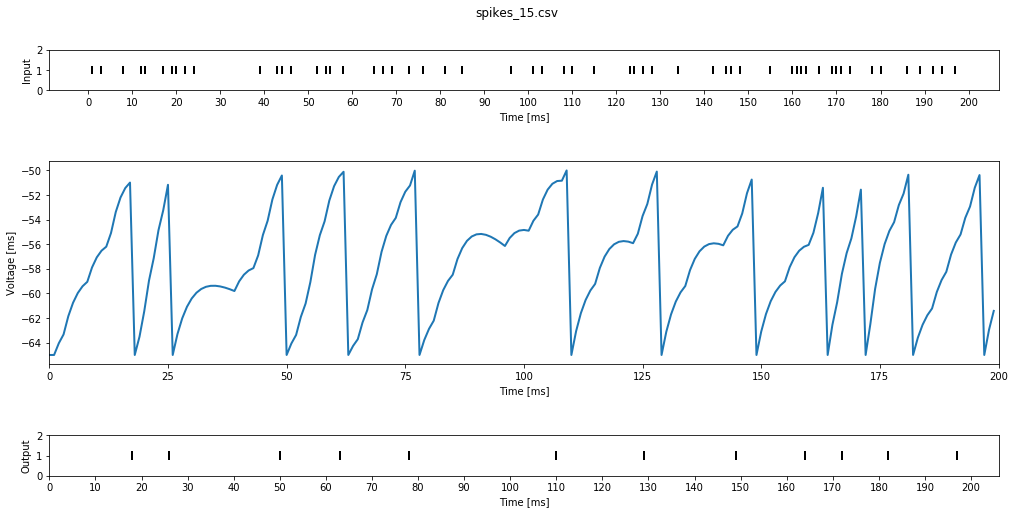

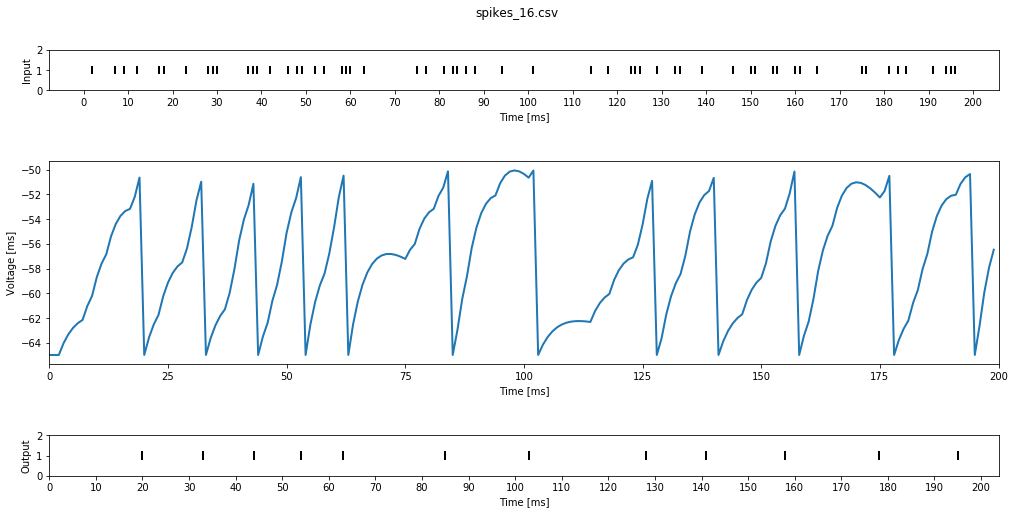

In [3]:
'''
Fetch available trains of spikes in path
'''
path = "input/"
files = fetch_files(path) 

'''
Simulate for each input file + Plot + Save data
'''
n = len(files)
for i in range(n):
    
    # Get Input Spikes from file
    f_name = files[i]
    sfn = f_name.replace(path, "")
    i_spikes = genfromtxt(files[i], delimiter=',')
    i_indexes = np.where(i_spikes>0)
    
    # Prepare variables
    v = [] # voltages
    o_spikes = [] # output spikes
    
    # Perform Simulation
    neuron_state = LIFFeedForwardState(v=v_0, i=i_0)
    for i_s in i_spikes:
        out, neuron_state = lif_cell(i_s*w, neuron_state)
        o_spikes.append(out.detach().numpy())
        v.append(float(neuron_state.v))
    o_spikes = np.array(o_spikes)
    o_indexes = np.where(o_spikes>0)
    
    # Plot Input/Ouput Spikes + Voltage
    xlim = len(i_spikes)
    plot_in_v_out(i_indexes, v, o_indexes, sfn, xlim)

    # Save Input/Ouput Spikes + Voltage as *.csv for further comparison
    np.savetxt("summary/norse/" + "voltage_" + sfn, np.array(v), delimiter=",")
    np.savetxt("summary/norse/" + "output_" + sfn, o_spikes, delimiter=",")